# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from time import process_time
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [37]:
df = pd.read_csv('Pancreatic.csv')
df

# Downloaded from:
#https://www.kaggle.com/datasets/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer

,sample_id,patient_cohort,sample_origin,Age,Gender,Diagnosis,stage,benign_sample_diagnosis,Blasma_CA19_9,Creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


# Replace numbers with classes names

In [38]:
replace_values = {1:'No Pancreatic Disease', 2:'Chronic Pancreatitis', 3:'Pancreatic Cancer'} 
df = df.replace({"Diagnosis": replace_values})

# Drop useless columns

In [39]:
df = df.drop(['sample_id', 'patient_cohort', 'sample_origin','stage','benign_sample_diagnosis'], axis=1)
df

,Age,Gender,Diagnosis,Blasma_CA19_9,Creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,No Pancreatic Disease,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,81,F,No Pancreatic Disease,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,51,M,No Pancreatic Disease,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,61,M,No Pancreatic Disease,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,62,M,No Pancreatic Disease,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...
585,68,M,Pancreatic Cancer,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,71,F,Pancreatic Cancer,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,63,M,Pancreatic Cancer,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,75,F,Pancreatic Cancer,NaN,1.33458,8.206777,205.930000,722.523000,NaN


# Move Diagnosis column to the last

In [40]:
df.insert(8, 'Diagnosis', df.pop('Diagnosis'))

df

,Age,Gender,Blasma_CA19_9,Creatinine,LYVE1,REG1B,TFF1,REG1A,Diagnosis
0,33,F,11.7,1.83222,0.893219,52.948840,654.282174,1262.000,No Pancreatic Disease
1,81,F,NaN,0.97266,2.037585,94.467030,209.488250,228.407,No Pancreatic Disease
2,51,M,7.0,0.78039,0.145589,102.366000,461.141000,NaN,No Pancreatic Disease
3,61,M,8.0,0.70122,0.002805,60.579000,142.950000,NaN,No Pancreatic Disease
4,62,M,9.0,0.21489,0.000860,65.540000,41.088000,NaN,No Pancreatic Disease
...,...,...,...,...,...,...,...,...,...
585,68,M,NaN,0.52026,7.058209,156.241000,525.178000,NaN,Pancreatic Cancer
586,71,F,NaN,0.85956,8.341207,16.915000,245.947000,NaN,Pancreatic Cancer
587,63,M,NaN,1.36851,7.674707,289.701000,537.286000,NaN,Pancreatic Cancer
588,75,F,NaN,1.33458,8.206777,205.930000,722.523000,NaN,Pancreatic Cancer


# Check NaN values

In [54]:
df.isna().sum()

Age                0
Gender             0
Blasma_CA19_9    240
Creatinine         0
LYVE1              0
REG1B              0
TFF1               0
REG1A            284
Diagnosis          0
dtype: int64

# Fill Nan values with mean value 

In [41]:
#df1

df1 = df[df['Diagnosis'] == 'No Pancreatic Disease']
df1['Blasma_CA19_9'].fillna((df1['Blasma_CA19_9'].mean()), inplace=True)
df1['REG1A'].fillna((df1['REG1A'].mean()), inplace=True)


#df2

df2 = df[df['Diagnosis'] == 'Chronic Pancreatitis']
df2['Blasma_CA19_9'].fillna((df2['Blasma_CA19_9'].mean()), inplace=True)
df2['REG1A'].fillna((df2['REG1A'].mean()), inplace=True)

#df3  

df3 = df[df['Diagnosis'] == 'Pancreatic Cancer']
df3['Blasma_CA19_9'].fillna((df3['Blasma_CA19_9'].mean()), inplace=True)
df3['REG1A'].fillna((df3['REG1A'].mean()), inplace=True)

df3

,Age,Gender,Blasma_CA19_9,Creatinine,LYVE1,REG1B,TFF1,REG1A,Diagnosis
391,81,F,1476.154733,0.56550,12.017150,431.422530,874.099700,1138.323721,Pancreatic Cancer
392,57,M,10.000000,1.73043,2.628425,40.620818,529.984000,155.270000,Pancreatic Cancer
393,55,M,11.000000,0.47502,2.830541,33.406150,323.175770,210.185000,Pancreatic Cancer
394,58,M,11.000000,0.44109,0.632433,188.253000,138.630000,1138.323721,Pancreatic Cancer
395,73,M,3236.000000,0.70122,12.245820,196.921830,1529.183124,432.917000,Pancreatic Cancer
...,...,...,...,...,...,...,...,...,...
585,68,M,1476.154733,0.52026,7.058209,156.241000,525.178000,1138.323721,Pancreatic Cancer
586,71,F,1476.154733,0.85956,8.341207,16.915000,245.947000,1138.323721,Pancreatic Cancer
587,63,M,1476.154733,1.36851,7.674707,289.701000,537.286000,1138.323721,Pancreatic Cancer
588,75,F,1476.154733,1.33458,8.206777,205.930000,722.523000,1138.323721,Pancreatic Cancer


# Concat the 3 dfs in on newdf

In [42]:
frames = [df1, df2,df3]

newdf = pd.concat(frames)
newdf = newdf.sample(frac = 1)
newdf

,Age,Gender,Blasma_CA19_9,Creatinine,LYVE1,REG1B,TFF1,REG1A,Diagnosis
483,67,F,1476.154733,0.090480,2.959210,29.138000,209.676000,1138.323721,Pancreatic Cancer
299,40,F,20.000000,0.169650,1.829490,6.586000,809.637000,547.458092,Chronic Pancreatitis
215,53,M,68.720000,0.409422,2.399891,137.113620,55.734998,933.050000,Chronic Pancreatitis
258,55,M,61.785741,0.746460,1.488295,2.872698,227.598800,46.980000,Chronic Pancreatitis
451,78,F,345.000000,0.463710,6.384745,76.450640,1045.124400,253.420000,Pancreatic Cancer
...,...,...,...,...,...,...,...,...,...
439,67,F,74.000000,0.667290,8.929678,374.512950,3103.221000,1457.906000,Pancreatic Cancer
277,67,M,1913.000000,1.074450,4.002688,67.564329,651.455300,243.320000,Chronic Pancreatitis
452,70,M,1806.000000,0.260130,4.420057,173.312720,774.040300,447.051000,Pancreatic Cancer
194,52,F,61.785741,0.192270,0.127130,36.126000,7.562000,547.458092,Chronic Pancreatitis


# Plot Class distribution

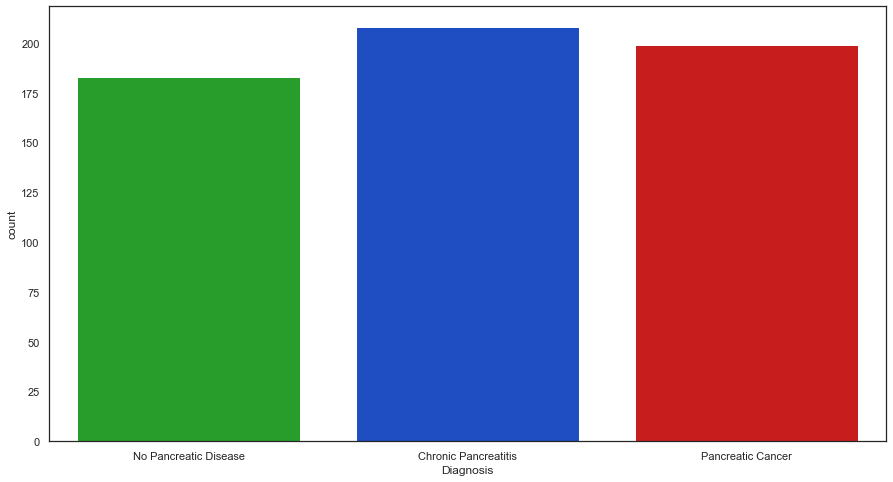

In [43]:
import seaborn as sns
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Diagnosis", data=df, palette=sns.xkcd_palette(["green", "blue","red"]))

# Encoding the categorical columns

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
newdf['Gender'] = le.fit_transform(newdf['Gender'])
newdf['Diagnosis']= le.fit_transform(newdf['Diagnosis'])

newdf

,Age,Gender,Blasma_CA19_9,Creatinine,LYVE1,REG1B,TFF1,REG1A,Diagnosis
483,67,0,1476.154733,0.090480,2.959210,29.138000,209.676000,1138.323721,2
299,40,0,20.000000,0.169650,1.829490,6.586000,809.637000,547.458092,0
215,53,1,68.720000,0.409422,2.399891,137.113620,55.734998,933.050000,0
258,55,1,61.785741,0.746460,1.488295,2.872698,227.598800,46.980000,0
451,78,0,345.000000,0.463710,6.384745,76.450640,1045.124400,253.420000,2
...,...,...,...,...,...,...,...,...,...
439,67,0,74.000000,0.667290,8.929678,374.512950,3103.221000,1457.906000,2
277,67,1,1913.000000,1.074450,4.002688,67.564329,651.455300,243.320000,0
452,70,1,1806.000000,0.260130,4.420057,173.312720,774.040300,447.051000,2
194,52,0,61.785741,0.192270,0.127130,36.126000,7.562000,547.458092,0


# Prepare the features x and the label y

In [45]:
x = newdf.drop(['Diagnosis'], axis=1)
y = newdf['Diagnosis']

# Data Rebalancing

In [46]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({0: 208, 2: 199, 1: 183})
Resampled dataset shape Counter({2: 208, 0: 208, 1: 208})


# Feature scaling

In [47]:
scaler = MinMaxScaler()
scaler.fit(x_res) 
x_res = scaler.transform(x_res)

# Train Test Split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.25, random_state=0)

# Find the best Machine Learning model

In [49]:
import lightgbm as lgb

#creating the objects

lr =LogisticRegression()
svc =SVC()
dt =DecisionTreeClassifier()
rf =RandomForestClassifier()
knn =KNeighborsClassifier()
Xgb = XGBClassifier()
Gnb = GaussianNB()
clf = lgb.LGBMClassifier()

models_dict = {0: 'Logistic Regression',
               1: 'Support Vector machine',
               2: 'Decision Tree', 
               3: 'Random Forest',
               4:'K-Nearest Neighbors',
               5:'XGBoost',
               6:'Gnb',
               7:'clf'}
models=[lr,svc,dt,rf,knn,Xgb,Gnb,clf]

for i,model in enumerate(models):
    start = process_time()
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    end = process_time()
    t= end - start
    acc = round(acc, 3)
    t = round(t, 3)

    print(" {} Classifier test accuracy is {} with {} seconds as training time " .format(models_dict[i],acc,t))

 Logistic Regression Classifier test accuracy is 0.526 with 0.094 seconds as training time 
 Support Vector machine Classifier test accuracy is 0.526 with 0.078 seconds as training time 
 Decision Tree Classifier test accuracy is 0.885 with 0.0 seconds as training time 
 Random Forest Classifier test accuracy is 0.929 with 0.641 seconds as training time 
 K-Nearest Neighbors Classifier test accuracy is 0.603 with 0.062 seconds as training time 
 XGBoost Classifier test accuracy is 0.923 with 1.953 seconds as training time 
 Gnb Classifier test accuracy is 0.718 with 0.109 seconds as training time 
 clf Classifier test accuracy is 0.929 with 1.141 seconds as training time 


# Plot Confusion Matrix

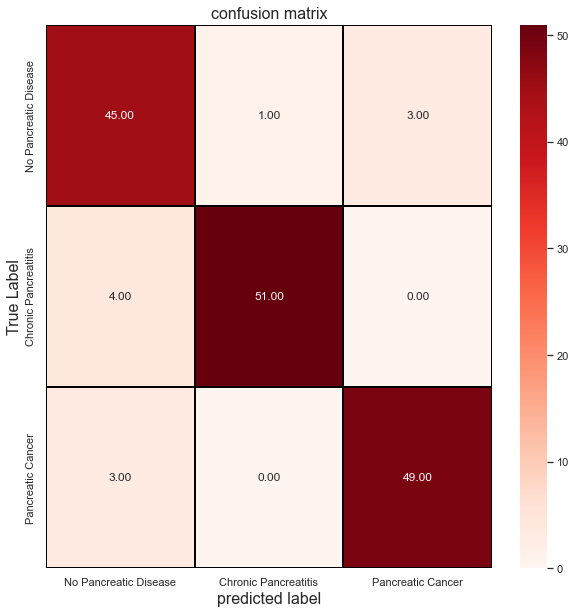

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred_rf = rf.predict(x_test)

classes=['No Pancreatic Disease','Chronic Pancreatitis','Pancreatic Cancer']

confusion_mtx = confusion_matrix(y_test,y_pred_rf)
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "black",fmt = ".2f",ax=ax, xticklabels= classes, yticklabels= classes
            )
plt.xlabel("predicted label",fontsize=16)
plt.ylabel("True Label",fontsize=16)
plt.title("confusion matrix",fontsize=16)
plt.show()

# Classification Report

In [52]:
print("Classification Report:\n",classification_report(y_test, y_pred_rf,target_names=classes))

Classification Report:
                        precision    recall  f1-score   support

No Pancreatic Disease       0.87      0.92      0.89        49
 Chronic Pancreatitis       0.98      0.93      0.95        55
    Pancreatic Cancer       0.94      0.94      0.94        52

             accuracy                           0.93       156
            macro avg       0.93      0.93      0.93       156
         weighted avg       0.93      0.93      0.93       156



In [59]:
y_pred_clf = clf.predict(x_test)
print("Classification Report:\n",classification_report(y_test, y_pred_clf,target_names=classes))

Classification Report:
                        precision    recall  f1-score   support

No Pancreatic Disease       0.84      0.96      0.90        49
 Chronic Pancreatitis       0.98      0.89      0.93        55
    Pancreatic Cancer       0.98      0.94      0.96        52

             accuracy                           0.93       156
            macro avg       0.93      0.93      0.93       156
         weighted avg       0.94      0.93      0.93       156



# Helper function to get the final result

In [18]:
def get_names(i):
    switcher={ 
        
            0: "Predcition result : No Pancreatic Disease",
            
            1: "Predicted result : Chronic Pancreatitis",
            
            2: "Predicted result : Pancreatic Cancer",
             }
    return switcher.get(i,"unspecified")

# Get Prediction on new instances

In [36]:
value1 = input("Please enter patient age :\n")
value2 = input("Please enter patient gender :\n")
value3 = input("Please enter Blasma_CA19_9 :\n")
value4 = input("Please enter Creatinine:\n")
value5 = input("Please enter LYVE1:\n")
value6 = input("Please enter REG1B:\n")
value7 = input("Please enter TFF1:\n")
value8 = input("Please enter REG1A:\n")

info = [[float(value1),float(value2),float(value3),float(value4),float(value5),
          float(value6),float(value7),float(value8)]]

new_instance =np.array(info).reshape(1,-1)

scaled_data = scaler.transform(new_instance)

prediction = rf.predict(scaled_data)

prediction=int(prediction) 

result = get_names(prediction)

print(result) 

#	60	0	147.700000	0.20358	3.934431	66.462480	390.015483	2529.000000	2

Please enter patient age :
60
Please enter patient gender :
0
Please enter Blasma_CA19_9 :
147.700000
Please enter Creatinine:
0.20358
Please enter LYVE1:
3.934431
Please enter REG1B:
66.462480
Please enter TFF1:
390.015483
Please enter REG1A:
2529.000000
Predicted result : Pancreatic Cancer


In [35]:
value1 = input("Please enter patient age :\n")
value2 = input("Please enter patient gender :\n")
value3 = input("Please enter Blasma_CA19_9 :\n")
value4 = input("Please enter Creatinine:\n")
value5 = input("Please enter LYVE1:\n")
value6 = input("Please enter REG1B:\n")
value7 = input("Please enter TFF1:\n")
value8 = input("Please enter REG1A:\n")

info = [[float(value1),float(value2),float(value3),float(value4),float(value5),
          float(value6),float(value7),float(value8)]]

new_instance =np.array(info).reshape(1,-1)

scaled_data = scaler.transform(new_instance)

prediction = rf.predict(scaled_data)

prediction=int(prediction) 

result = get_names(prediction)

print(result)

#	64	0	6.159064	0.45240	0.000906	2.896185	0.906008	227.871886	1

Please enter patient age :
64
Please enter patient gender :
0
Please enter Blasma_CA19_9 :
6.159064
Please enter Creatinine:
0.45240
Please enter LYVE1:
0.000906
Please enter REG1B:
2.896185
Please enter TFF1:
0.906008
Please enter REG1A:
227.871886
Predicted result : Chronic Pancreatitis


In [34]:
value1 = input("Please enter patient age :\n")
value2 = input("Please enter patient gender :\n")
value3 = input("Please enter Blasma_CA19_9 :\n")
value4 = input("Please enter Creatinine:\n")
value5 = input("Please enter LYVE1:\n")
value6 = input("Please enter REG1B:\n")
value7 = input("Please enter TFF1:\n")
value8 = input("Please enter REG1A:\n")

info = [[float(value1),float(value2),float(value3),float(value4),float(value5),
          float(value6),float(value7),float(value8)]]

new_instance =np.array(info).reshape(1,-1)

scaled_data = scaler.transform(new_instance)

prediction = rf.predict(scaled_data)

prediction=int(prediction) 

result = get_names(prediction)

print(result)

#	53	1	25.000000	1.35720	4.115126	99.147000	425.390000	547.458092	0

Please enter patient age :
53
Please enter patient gender :
1
Please enter Blasma_CA19_9 :
25.000000
Please enter Creatinine:
1.35720
Please enter LYVE1:
4.115126
Please enter REG1B:
99.147000
Please enter TFF1:
425.390000
Please enter REG1A:
547.458092
Predcition result : No Pancreatic Disease
